In [1]:
import os
import sys
import json

import numpy as np

sys.path.insert(0, '/mnt/d/projects/bassline_transcription') 

from utilities import *
from signal_processing import lp_and_normalize

In [2]:
from torch import tensor

#from demucs.separate import main

from demucs.pretrained import load_pretrained
from demucs.utils import apply_model

In [21]:
output_dir = os.path.join('..','data','transcription_test')
clip_dir = os.path.join(output_dir,'audio_clips')
metadata_dir = os.path.join(output_dir,'metadata')

#directories = get_directories('../data/directories.json')
directories = get_directories(os.path.join(output_dir,'directories.json'))

scales, track_dicts, track_titles = read_metadata(directories['extraction'])

title = track_titles[0]
print(title)

chorus, bassline = load_chorus_and_bassline(title, directories) # read the chorus and the bassline

Cm_CrossSweep_16th_note


In [4]:
#'demucs'
#'demucs_extra'
#'tasnet'
#'tasnet_extra'
model = load_pretrained('demucs')

wav = np.expand_dims(chorus, 1)

In [22]:
wav = np.stack([chorus]*2, axis=0)

ref = wav.mean(0)
wav = (wav - ref.mean()) / ref.std()

wav = tensor(wav)

In [23]:
source_names = ["drums", "bass", "other", "vocals"]

sources = apply_model(model, wav, shifts=0, split=True,
                      overlap=0.25, progress=True)

sources = sources * ref.std() + ref.mean()

100%|██████████████████████████████████████████████████████████████████████████| 30.0/30.0 [00:04<00:00,  6.55seconds/s]


In [24]:
bassline = sources[1,:,:].numpy()

bassline = bassline.mean(axis=0)

bassline_cut = lp_and_normalize(bassline, 130, 44100, 3001)




Fs = 44100, x.shape = (338689,), x.dtype = float64


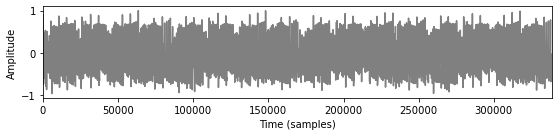

In [25]:
print_plot_play(bassline_cut, 44100)